# Playlists Analysis

In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
data = pd.read_csv("playlists.csv", sep=";", encoding = "ISO-8859-1") 

In [4]:
data.shape

(1782, 64)

Data extracted.

In [27]:
data.columns

Index(['company', 'playlist_sample', 'namesfiles', 'no', 'artist', 'song',
       'sampleratefiles', 'totalsamplesfiles', 'durationfiles', 'bitratefiles',
       'rmsfiles', 'rmsmedianfiles', 'lowenergyfiles', 'ASRfiles',
       'beatspectrumfiles', 'eventdensityfiles', 'tempofiles',
       'pulseclarityfiles', 'zerocrossfiles', 'rolloffsfiles',
       'brightnessfiles', 'spreadfiles', 'centroidfiles', 'kurtosisfiles',
       'flatnessfiles', 'entropyfiles', 'mfccfiles_1', 'mfccfiles_2',
       'mfccfiles_3', 'mfccfiles_4', 'mfccfiles_5', 'mfccfiles_6',
       'mfccfiles_7', 'mfccfiles_8', 'mfccfiles_9', 'mfccfiles_10',
       'mfccfiles_11', 'mfccfiles_12', 'mfccfiles_13', 'pitchfiles',
       'inharmonicityfiles', 'bestkeyfiles', 'keyclarityfiles',
       'modalityfiles', 'tonalcentroidfiles_1', 'tonalcentroidfiles_2',
       'tonalcentroidfiles_3', 'tonalcentroidfiles_4', 'tonalcentroidfiles_5',
       'tonalcentroidfiles_6', 'chromagramfiles_1', 'chromagramfiles_2',
       'chromag

In [28]:
data.describe(include="all")

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_5,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles
count,1782,1782.000000,1782,1782.000000,1782,1782,1782.0,1.782000e+03,1782.000000,1782.000000,...,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
unique,6,NaN,515,NaN,353,443,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arte Francés,NaN,18 - Minimatic - No Swinggity.mp3 ...,NaN,Satin Jackets,Hula Hoop.mp3 ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,441,NaN,6,NaN,51,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.084175,NaN,17.116162,NaN,NaN,44100.0,1.043632e+07,236.651237,252.336700,...,0.332301,0.319191,0.265246,0.440462,0.549565,0.581967,0.477825,0.430522,15.804409,0.507503
std,NaN,1.114796,NaN,11.837401,NaN,NaN,0.0,3.227105e+06,73.176981,88.377597,...,0.270616,0.263919,0.249612,0.290454,0.314771,0.323173,0.321646,0.295563,9.338659,0.247587
min,NaN,1.000000,NaN,1.000000,NaN,NaN,44100.0,5.965054e+06,135.262000,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168304
25%,NaN,1.000000,NaN,8.000000,NaN,NaN,44100.0,8.353151e+06,189.413850,128.000000,...,0.116591,0.109123,0.075378,0.204738,0.301961,0.316822,0.214680,0.203097,9.810711,0.285584
50%,NaN,2.000000,NaN,15.500000,NaN,NaN,44100.0,9.480378e+06,214.974562,320.000000,...,0.262799,0.259887,0.183082,0.396861,0.520957,0.570088,0.418077,0.379737,14.833864,0.452456
75%,NaN,3.000000,NaN,24.000000,NaN,NaN,44100.0,1.146931e+07,260.075075,320.000000,...,0.494897,0.469603,0.384485,0.642814,0.829318,0.918554,0.735384,0.616558,19.964413,0.730669


In [6]:
data.head()

,company,playlist_sample,namesfiles,no,artist,song,sampleratefiles,totalsamplesfiles,durationfiles,bitratefiles,...,chromagramfiles_5,chromagramfiles_6,chromagramfiles_7,chromagramfiles_8,chromagramfiles_9,chromagramfiles_10,chromagramfiles_11,chromagramfiles_12,attackslopefiles,attackleapfiles
0,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.088080,0.344721,0.000000,0.029990,0.000000,0.123955,0.999999,0.025801,17.573492,0.456036
1,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.174508,0.340706,0.191612,0.860171,0.415158,0.372546,1.000000,0.333313,3.057561,0.258182
2,Arte Francés,4,01 - Klischee - Swing It Like Roger.mp3 ...,1,Klischee,Swing It Like Roger.mp3 ...,44100,8672822,196.662625,320,...,0.151998,0.348799,0.194046,0.831852,0.582866,0.444389,1.000000,0.254364,20.069370,0.229477
3,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320,...,0.183869,0.046128,0.047070,0.103043,0.912696,1.000000,0.104921,0.131453,6.403050,0.169508
4,Arte Francés,4,02 - Shazalakazoo - Sunny Side Of The Street.m...,2,Shazalakazoo,Sunny Side Of The Street.mp3 ...,44100,11231507,254.682700,320,...,0.179867,0.029339,0.036758,0.070648,0.916178,1.000000,0.090701,0.125767,10.845848,0.402227


Find positives and negatives songs of the process for every company.

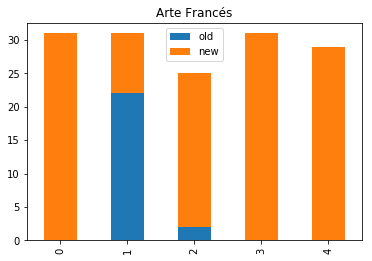

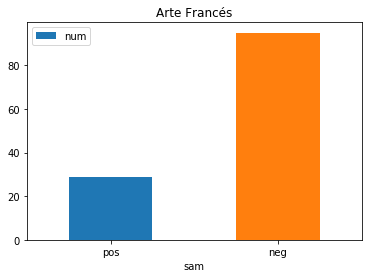

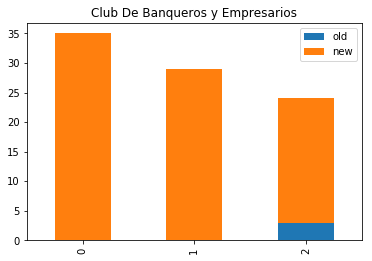

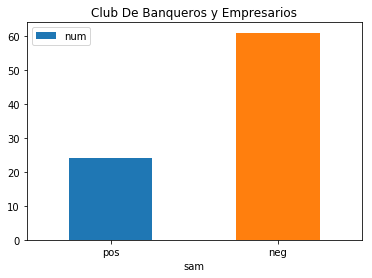

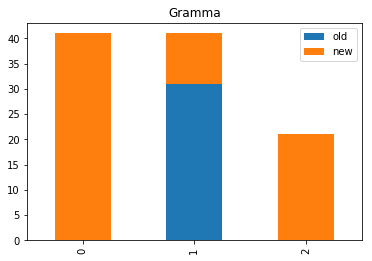

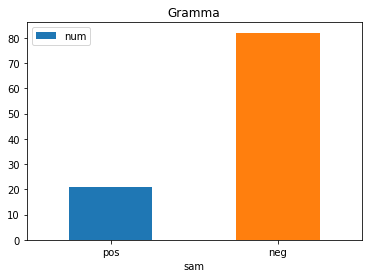

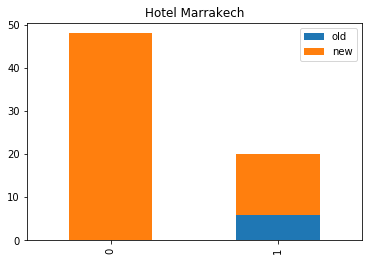

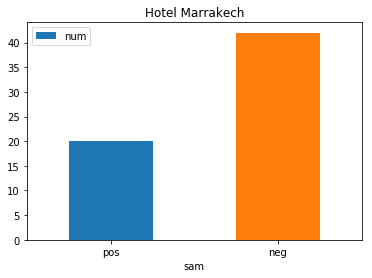

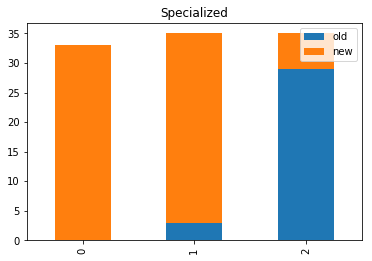

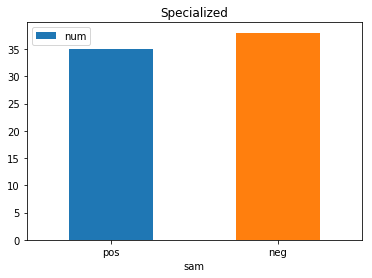

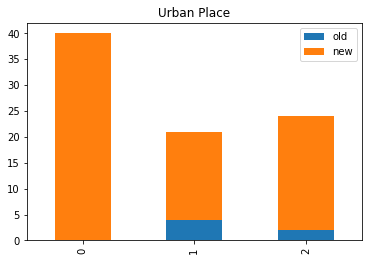

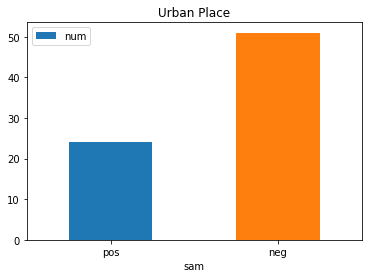

In [25]:
companies = data['company'].unique()
by_company = [data[data.company == company] for company in companies]
positives = []
negatives = []
for data_com in by_company:
    data_com = data_com.sort_values('playlist_sample')
    last_pl = int(data_com.tail(1).playlist_sample)
    pls = pd.DataFrame({'pl':range (1,last_pl+1), 'old':[0]*last_pl, 'new':[0]*last_pl})
    pls.new[0]=(data_com.query('playlist_sample == '+str(1)).shape[0])/3
    for i in range(2,last_pl+1):
        curr_pl = data_com.query('playlist_sample == '+str(i))
        pre_pl = data_com.query('playlist_sample == '+str(i-1))
        olds = curr_pl['song'].map(pre_pl['song'].value_counts()).sum(axis = 0)/3
        pls.old[i-1]= olds/3 
        pls.new[i-1]=(curr_pl.shape[0]-olds)/3
    pls[['old','new']].plot(kind='bar', stacked=True, title=data_com.iloc[0,0])
    df_last_pl= data_com.query('playlist_sample == '+str(last_pl))
    positives.append(df_last_pl)
    pos_loc = pd.DataFrame({}, columns=data_com.columns)
    for index, row in data_com[data_com.playlist_sample<last_pl].iterrows(): 
        if not ((df_last_pl['artist'] == row['artist']) & (df_last_pl['song'] ==  row['song'])).any():
            pos_loc= pos_loc.append(row, ignore_index=True)
    n_vs_p = pd.DataFrame({'sam':['pos', 'neg'],'num':[df_last_pl.shape[0]/3,pos_loc.shape[0]/3]})
    n_vs_p.plot.bar(x='sam', y='num', rot=0, title=data_com.iloc[0,0])
    negatives.append(pos_loc)

Count of positives negatives and total by company.

In [80]:
for i in range(len(companies)):
    print(companies[i])
    print("Negatives: ",negatives[i].shape[0]/3)
    print("Positives: ",positives[i].shape[0]/3)
    print("Total: ", by_company[i].shape[0]/3)

Arte Francés
Negatives:  95.0
Positives:  29.0
Total:  147.0
Club De Banqueros y Empresarios
Negatives:  61.0
Positives:  24.0
Total:  88.0
Gramma
Negatives:  82.0
Positives:  21.0
Total:  103.0
Hotel Marrakech
Negatives:  42.0
Positives:  20.0
Total:  68.0
Specialized
Negatives:  38.0
Positives:  35.0
Total:  103.0
Urban Place
Negatives:  51.0
Positives:  24.0
Total:  85.0


Append the positives and negatives records with a new column "chosen" that takes value of 1 if is chosen.

In [156]:
df_n_ps = []
for i in range(len(negatives)):
    negatives[i]['chosen']=0
    positives[i]['chosen']=1
    df_n_ps.append(negatives[i].append(positives[i]))

D:\Usuarios\1144084318\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## ANOVA

Shows regression results for post hoc tukey comparison p values lesser than 0.05. After that, it shows the homogeneity of variance and normality tests (which are assumptions of Anova test). 

****************************************************************************
Arte Francés
mfccfiles_2
mfccfiles_6
mfccfiles_8
mfccfiles_11
keyclarityfiles
****************************************************************************
Club De Banqueros y Empresarios
lowenergyfiles
tempofiles
pulseclarityfiles
zerocrossfiles
brightnessfiles
                            OLS Regression Results                            
Dep. Variable:        brightnessfiles   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     43.84
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.12e-10
Time:                        14:56:44   Log-Likelihood:                 226.10
No. Observations:                 255   AIC:                            -448.2
Df Residuals:                     253   BIC:                            -441.1
Df Model:                    

inharmonicityfiles
chromagramfiles_10
****************************************************************************
Hotel Marrakech
rmsfiles
                            OLS Regression Results                            
Dep. Variable:               rmsfiles   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           4.32e-05
Time:                        14:56:44   Log-Likelihood:                 240.55
No. Observations:                 186   AIC:                            -477.1
Df Residuals:                     184   BIC:                            -470.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025

spreadfiles
centroidfiles
flatnessfiles
entropyfiles
mfccfiles_1
chromagramfiles_5
chromagramfiles_7
****************************************************************************
Urban Place
mfccfiles_12
                            OLS Regression Results                            
Dep. Variable:           mfccfiles_12   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     14.42
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           0.000189
Time:                        14:56:45   Log-Likelihood:                 185.01
No. Observations:                 225   AIC:                            -366.0
Df Residuals:                     223   BIC:                            -359.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
       

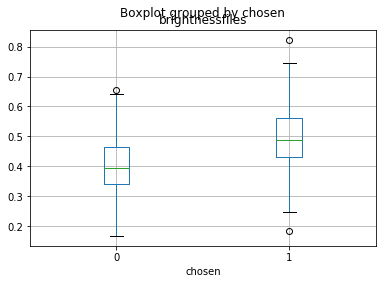

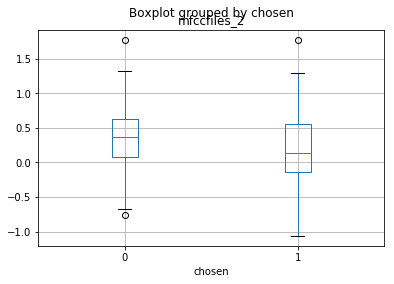

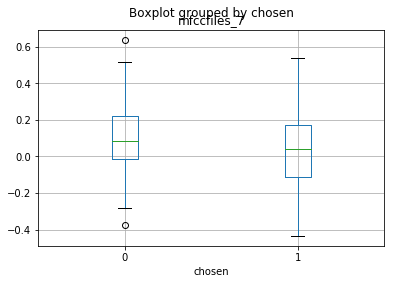

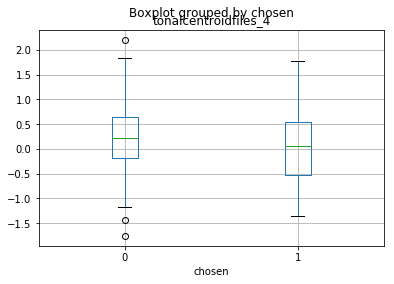

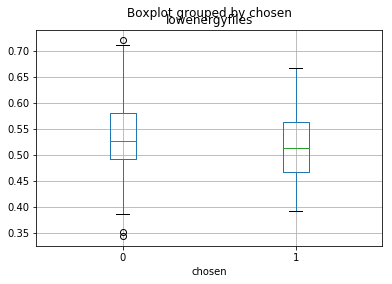

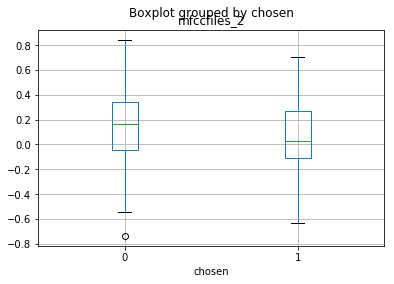

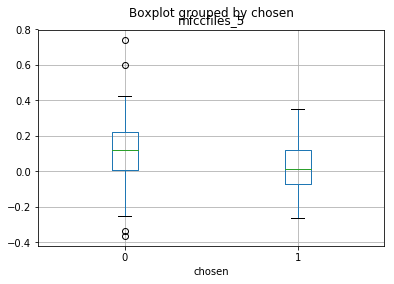

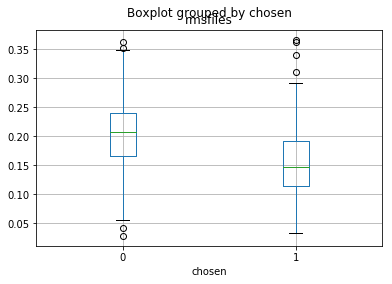

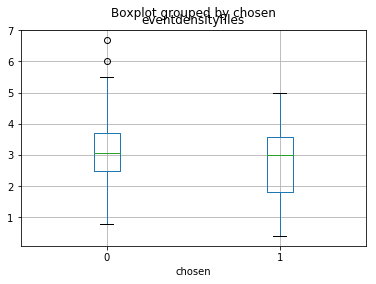

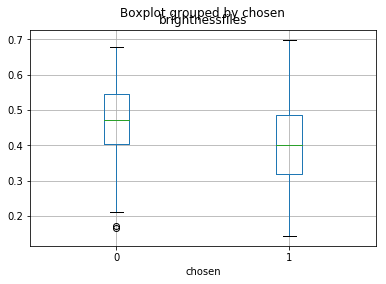

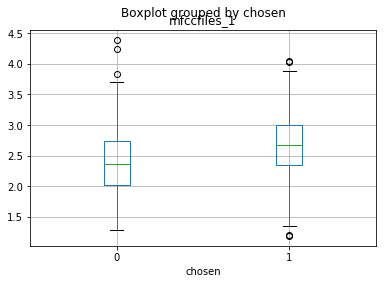

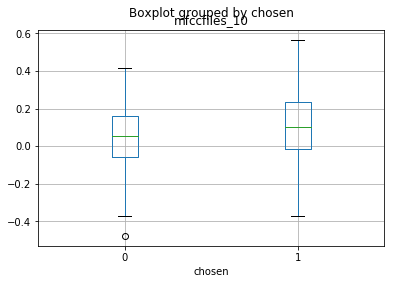

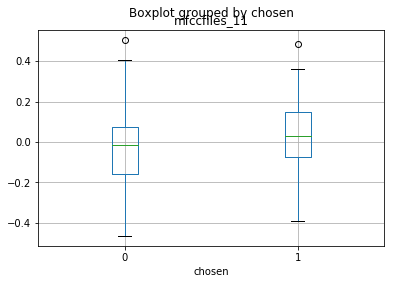

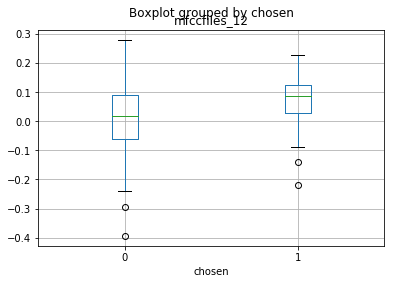

In [173]:
alpha = 0.05
for df_n_p in df_n_ps:
    print("****************************************************************************")
    print(df_n_p.iloc[0,0])
    for index in range(10,df_n_p.shape[1]-1):
        name= df_n_p.columns.values[index]
        df_n_p[name]=df_n_p[name].astype('float64') 
        mc = MultiComparison(df_n_p[name], df_n_p['chosen'])
        mc_results = mc.tukeyhsd()
        if mc_results._results_table.data[1:][0][5]:
            print(name)
            results = ols(name+' ~ C(chosen)', data=df_n_p).fit()
            homogeneity_test = stats.levene(df_n_p[name][df_n_p['chosen'] == 0], df_n_p[name][df_n_p['chosen'] == 1])[1]
            normality_test = stats.shapiro(results.resid)[1]
            if homogeneity_test > alpha and normality_test > alpha:
                print(results.summary())
                df_n_p.boxplot(name, by='chosen')

# Pregunta:
¿También se debe hacer de comparación de todas las canciones que están registradas por compañía sin importar el playlist o entre compañía tomando solo los positives (ult pl))?

# Clustering

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 64 columns):
company                 1782 non-null object
playlist_sample         1782 non-null int64
namesfiles              1782 non-null object
no                      1782 non-null int64
artist                  1782 non-null object
song                    1782 non-null object
sampleratefiles         1782 non-null int64
totalsamplesfiles       1782 non-null int64
durationfiles           1782 non-null float64
bitratefiles            1782 non-null int64
rmsfiles                1782 non-null float64
rmsmedianfiles          1782 non-null float64
lowenergyfiles          1782 non-null float64
ASRfiles                1782 non-null float64
beatspectrumfiles       1782 non-null float64
eventdensityfiles       1782 non-null float64
tempofiles              1782 non-null float64
pulseclarityfiles       1782 non-null float64
zerocrossfiles          1782 non-null float64
rolloffsfiles           1782 non-

In [31]:
data.bitratefiles = data.bitratefiles.astype('float64')
data.pitchfiles = data.pitchfiles.astype('float64')
data.bestkeyfiles = data.bestkeyfiles.astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 64 columns):
company                 1782 non-null object
playlist_sample         1782 non-null int64
namesfiles              1782 non-null object
no                      1782 non-null int64
artist                  1782 non-null object
song                    1782 non-null object
sampleratefiles         1782 non-null int64
totalsamplesfiles       1782 non-null int64
durationfiles           1782 non-null float64
bitratefiles            1782 non-null float64
rmsfiles                1782 non-null float64
rmsmedianfiles          1782 non-null float64
lowenergyfiles          1782 non-null float64
ASRfiles                1782 non-null float64
beatspectrumfiles       1782 non-null float64
eventdensityfiles       1782 non-null float64
tempofiles              1782 non-null float64
pulseclarityfiles       1782 non-null float64
zerocrossfiles          1782 non-null float64
rolloffsfiles           1782 no

Vamos a reemplazar los NaN y entonces a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [75]:
data = data.fillna(0)
dataStd = pd.DataFrame(preprocessing.scale(data.iloc[:,8:]))
dataStd.columns=data.columns[8:]
dataStd.mean(axis=0)

durationfiles           2.118271e-17
bitratefiles            9.565861e-16
rmsfiles               -4.236541e-17
rmsmedianfiles         -9.469916e-18
lowenergyfiles          6.322415e-16
ASRfiles                2.117025e-16
beatspectrumfiles       1.189814e-16
eventdensityfiles      -4.901304e-16
tempofiles              4.909404e-17
pulseclarityfiles       8.270601e-17
zerocrossfiles          1.672188e-16
rolloffsfiles           3.420384e-16
brightnessfiles        -1.221121e-17
spreadfiles            -3.812887e-17
centroidfiles          -4.494472e-16
kurtosisfiles          -1.564717e-16
flatnessfiles           3.293288e-16
entropyfiles            8.131667e-16
mfccfiles_1             1.659104e-16
mfccfiles_2             3.140025e-17
mfccfiles_3             2.759982e-17
mfccfiles_4            -5.519964e-17
mfccfiles_5            -8.756557e-17
mfccfiles_6             7.026117e-17
mfccfiles_7            -8.641298e-17
mfccfiles_8            -4.383730e-17
mfccfiles_9             2.678989e-18
m

In [76]:
dataStd.std(axis=0)

durationfiles           1.000281
bitratefiles            1.000281
rmsfiles                1.000281
rmsmedianfiles          1.000281
lowenergyfiles          1.000281
ASRfiles                1.000281
beatspectrumfiles       1.000281
eventdensityfiles       1.000281
tempofiles              1.000281
pulseclarityfiles       1.000281
zerocrossfiles          1.000281
rolloffsfiles           1.000281
brightnessfiles         1.000281
spreadfiles             1.000281
centroidfiles           1.000281
kurtosisfiles           1.000281
flatnessfiles           1.000281
entropyfiles            1.000281
mfccfiles_1             1.000281
mfccfiles_2             1.000281
mfccfiles_3             1.000281
mfccfiles_4             1.000281
mfccfiles_5             1.000281
mfccfiles_6             1.000281
mfccfiles_7             1.000281
mfccfiles_8             1.000281
mfccfiles_9             1.000281
mfccfiles_10            1.000281
mfccfiles_11            1.000281
mfccfiles_12            1.000281
mfccfiles_

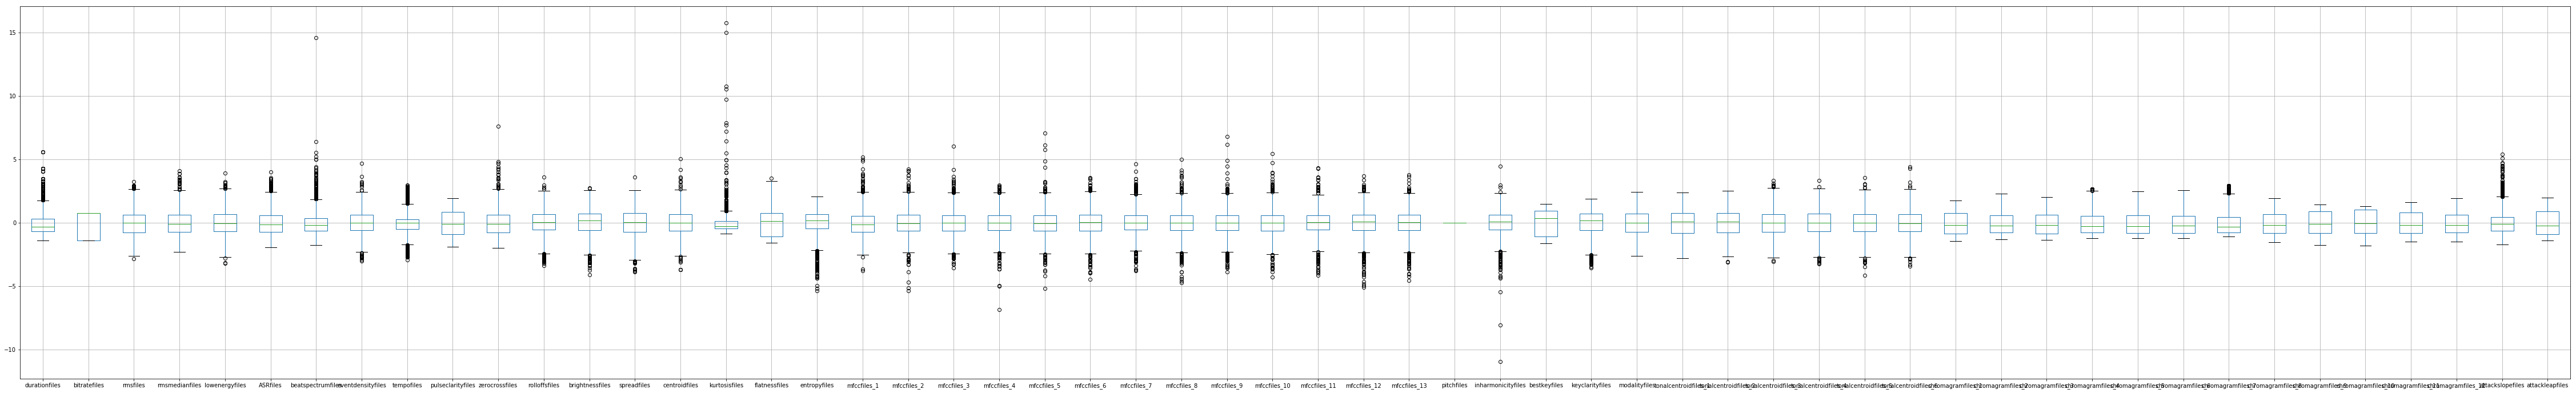

In [81]:
plt.figure(figsize=(80,12))
dataStd.boxplot()

## Clustering

**Con un k de 3, realice un clustering por K-Means (utilicen random_state=0).**

**Agregue una columna "Cluster" con el segmento correspondiente (0, 1, o 2) al dataset.**

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Se pueden hacer varios k-means: 
1. Entre negatives y positives de la misma compañía
2. Entre canciones de distintas compañías (todas o los positives (ult pl))